In [1]:
import sys
import numpy as np
from pyserini.index import pyutils
import matplotlib.pyplot as plt
import random

In [2]:
home_dir = "/home/lo/Documents/Scriptie/anserini/"
index_word = "index/robust04"
index_slr = "index/robust04_slr"
index_fake_slr = "index/zipfian_robust04_slr"

index_utils_w = pyutils.IndexReaderUtils(home_dir + index_word)
index_utils_s = pyutils.IndexReaderUtils(home_dir + index_slr)
index_utils_f = pyutils.IndexReaderUtils(home_dir + index_fake_slr)

In [3]:
word_list = [(word.term, word.df) for word in index_utils_w.terms()]
slr_list = [(slr.term, slr.df) for slr in index_utils_s.terms()]
fake_slr_list = [(slr.term, slr.df) for slr in index_utils_f.terms()]

In [4]:
word_list.sort(key=lambda tup: tup[1], reverse=True)
slr_list.sort(key=lambda tup: tup[1], reverse=True)
fake_slr_list.sort(key=lambda tup: tup[1], reverse=True)

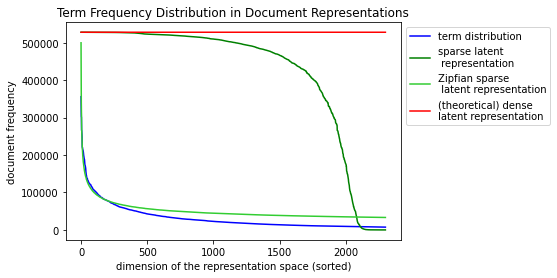

In [8]:
upto = 2300

x_ax = np.linspace(0,upto,upto + 1)
y_wx = [pair[1] for pair in word_list[0:upto + 1]]
y_sx = [pair[1] for pair in slr_list[0:upto + 1]]
y_fx = [pair[1] for pair in fake_slr_list[0:upto + 1]]
y_dx = [528150 for i in range(upto + 1)]
plt.plot(x_ax, y_wx, markersize=2, color="blue", label="term distribution")
plt.plot(x_ax, y_sx, markersize=2, color="green", label="sparse latent\n representation")
plt.plot(x_ax, y_fx, markersize=2, color="limegreen", label="Zipfian sparse\n latent representation")
plt.plot(x_ax, y_dx, markersize=2, color="red", label="(theoretical) dense \nlatent representation")
plt.title("Term Frequency Distribution in Document Representations")
plt.xlabel("dimension of the representation space (sorted)")
plt.ylabel("document frequency")
plt.legend( bbox_to_anchor=(1, 1),
          ncol=1, fancybox=True, shadow=False)
plt.savefig("zipfian-compare", bbox_inches='tight')
plt.show()


In [6]:
# Getting avg term frequency
word_avg_tf = np.average([tup[1] for tup in word_list])
slr_avg_tf = np.average([tup[1] for tup in slr_list])
fake_slr_avg_tf = np.average([tup[1] for tup in fake_slr_list])
print("The average tf of the word based index is " + str(word_avg_tf))
print("The average tf of the slr based index is " + str(slr_avg_tf))
print("The average tf of the zipf slr based index is " + str(fake_slr_avg_tf))

The average tf of the word based index is 107.691910430176
The average tf of the slr based index is 405945.5002099958
The average tf of the zipf slr based index is 38929.7696


In [7]:
# Getting random sample of 10k documents and the term density
home_dir_id = "/home/lo/Documents/Scriptie/anserini/data/"
slr_file_id = "robust04_raw_docs.num_query_glove_stop_lucene_remove_unk_max_len_1500.tsv_repr.tsv"

def get_doc_ids(file_path):
    docid_list = []
    
    for line in open(file_path, "r"):
        docid_list.append(line.split("\t")[0])
    return docid_list

def get_doc_vec(index, doc_ids):
    vecs = []
    for doc in doc_ids:
        vec = None
        try:
            print(doc)
            vec = index.get_document_vector(doc)
            print(vec)
        except:
            continue
        if vec != None:
            vecs.append(vec)
    return vecs

In [7]:
doc_ids = get_doc_ids(home_dir_id + slr_file_id)
doc_ids_10k = random.sample(doc_ids, 10000)
doc_vecs_w = get_doc_vec(index_utils_w, doc_ids_10k)
doc_vecs_s = get_doc_vec(index_utils_s, doc_ids_10k)

FT931-9412
FT922-11204
LA020590-0123
FBIS4-54448
FT932-7277
FR941006-2-00142
FBIS3-27634
LA111390-0075
LA042889-0150
FBIS3-23806
FBIS3-21404
FT923-6456
LA020789-0099
FT934-16232
FT921-5870
LA103090-0128
LA062989-0169
FT933-11017
FBIS3-35448
FT921-8837
LA080390-0103
LA071290-0141
FT922-4068
FBIS3-132
FT931-11269
FBIS4-29984
FBIS4-25255
FBIS4-43344
LA091990-0083
FBIS3-26850
FT943-3863
FT924-8956
FBIS3-53008
FBIS3-38801
FT921-8183
FBIS3-31657
FT933-1867
FT921-14795
FBIS3-1121
FT932-2571
LA043090-0023
FT942-13803
LA110489-0079
LA081790-0170
FT941-9906
FBIS3-41048
FBIS3-49419
FT932-15273
FR940203-1-00022
LA091089-0106
FT934-11157
LA080990-0016
FT933-8557
FBIS4-35742
LA021689-0076
FT931-12291
FT923-14252
FBIS4-2988
FT931-4949
LA031190-0170
FT934-4387
FT943-6455
FT924-14129
FT942-9244
FBIS4-44153
FR940412-2-00081
FT944-2228
LA010189-0142
LA111989-0188
FT922-2839
LA040490-0134
FBIS3-4202
FR940811-2-00106
FT923-2307
FT944-14156
FBIS3-23434
FBIS3-34647
FR940106-1-00009
FT944-7668
FT944-13104
FT9

FBIS3-23664
FT911-458
FBIS3-51516
FBIS3-49382
LA080990-0103
FT944-170
LA120289-0096
FT934-16594
FBIS4-43879
LA050689-0096
LA032590-0103
FBIS3-5630
FBIS3-40737
FBIS3-49975
LA070989-0014
LA081990-0143
FR941007-1-00067
FR940527-0-00011
FBIS4-42176
FR941220-0-00089
LA072290-0055
FBIS3-4886
FT944-5836
FT943-741
FR940812-0-00087
FBIS3-11347
FR940208-1-00068
FBIS4-65121
LA012490-0097
FBIS4-60470
FT922-12653
FBIS4-10868
FBIS3-48589
FT944-3202
LA121789-0133
FBIS3-34474
FT922-6254
LA071990-0116
FT943-16967
FT931-12064
FBIS3-52791
FR940804-0-00016
FR940414-0-00064
LA122190-0008
LA102789-0016
LA060789-0038
LA031090-0073
FT943-3147
FT932-2584
FBIS4-63609
FT943-11625
FR941026-0-00055
FT924-4654
FT932-11726
FT922-1764
FBIS3-61283
LA091790-0025
FT941-15922
LA040990-0139
LA091490-0131
LA010490-0069
FR940127-2-00101
FBIS4-48417
LA111090-0131
FT931-8935
FT941-14569
LA081889-0054
LA061689-0075
LA082390-0240
LA092090-0206
FT933-8299
FT944-380
LA112289-0124
FR940927-0-00025
FR940429-2-00003
LA060990-0116
FT

FBIS4-33702
LA051190-0064
LA081290-0061
FT944-15556
LA072190-0017
LA110389-0011
FR940413-1-00026
FBIS4-12407
FR940906-0-00077
FT924-11924
FBIS4-9665
FT934-11404
LA090890-0090
FBIS3-38558
FBIS4-9160
FBIS4-227
FT932-2665
FT923-3300
FT923-12731
LA011290-0059
LA102089-0194
FT944-18176
FBIS4-20089
FT944-9515
FBIS3-46453
LA113089-0026
FBIS4-31685
LA010890-0105
FT923-7418
LA072190-0140
FT932-10011
FR940802-2-00066
LA081189-0032
FBIS4-6972
FR940214-2-00227
FT921-10878
FBIS4-25888
LA042990-0027
FBIS3-58242
LA061990-0005
FR940524-2-00024
LA042889-0161
FBIS4-47369
FT931-16565
FT943-15089
FR941019-2-00120
LA111889-0167
FBIS3-12976
FT934-3609
FT943-8561
FT923-12576
FT944-5655
LA022590-0229
FT931-15142
FBIS3-53522
FBIS4-6267
FT921-6887
FT942-5704
FT941-5421
FBIS3-56022
FT922-12139
LA093090-0243
FBIS3-28745
FT933-13929
FBIS3-54297
FT922-1546
FBIS3-34505
LA031890-0174
FBIS3-43629
FBIS3-36775
LA102089-0031
LA080890-0139
FT933-15020
FR940407-1-00021
FBIS4-33290
FT943-351
FBIS4-54106
FT921-3082
FT911-108

FT941-6581
FBIS3-25530
FT944-2774
FT932-4617
FBIS4-22258
FT921-10304
FT932-10841
FBIS4-49869
FBIS4-3369
FT923-10999
LA112389-0063
FT941-12561
LA042089-0088
FT933-204
FBIS4-58123
FR940325-2-00083
FBIS3-20235
FBIS3-58276
FBIS4-52235
FBIS4-29691
FBIS4-6278
FT933-16022
FT941-12489
FT932-2992
FBIS4-60063
FT942-14430
FR941004-2-00132
FBIS4-37290
FT921-1217
FBIS4-51797
FBIS4-55902
FBIS3-5723
FBIS3-32916
FT924-3497
FT923-6119
LA031689-0100
FBIS4-26831
LA050990-0130
LA011989-0045
FR940830-2-00166
LA120389-0127
LA072389-0159
LA051889-0128
LA012889-0088
LA082390-0178
FT922-2709
LA020289-0036
FBIS4-68283
LA101890-0241
LA030590-0050
FBIS3-18006
FR940325-2-00098
FT921-10414
FBIS3-14252
FR940413-0-00050
FBIS4-9704
FBIS4-62524
FBIS3-41189
FR940105-0-00043
FT921-215
FT931-9908
FBIS4-55051
FT932-9447
FT932-2720
FBIS3-28325
LA090890-0095
FT941-3202
FT941-12997
FT932-12691
FT944-17614
FT922-9761
LA081789-0006
LA123189-0118
FT941-2752
FBIS3-51663
FR941003-2-00030
LA052389-0053
FBIS4-24047
FBIS3-7202
FBIS3-

LA100789-0081
FBIS3-27404
FBIS4-41523
FBIS4-55961
FT942-11503
LA011989-0186
LA041390-0086
FT934-9476
LA032090-0180
FBIS3-34769
LA022790-0137
FT921-12337
FT933-16891
FT924-15580
LA052590-0205
LA012190-0101
FT923-412
FT942-1882
FT924-3283
FT924-14231
FT944-5622
FT941-5144
LA100289-0050
LA071890-0042
LA041389-0043
FT943-13153
FR940208-2-00033
FBIS4-61684
FR940328-2-00104
FT924-5113
FT922-17
LA103189-0054
FBIS3-31662
FBIS4-54531
FT924-9293
LA073089-0162
FT942-6588
FT944-11876
FT932-761
LA102690-0052
FT933-9590
FT941-1060
FT932-6038
FBIS4-10693
FR941102-1-00051
LA071590-0029
FBIS3-21914
LA071290-0024
FT942-14412
FBIS4-42589
LA020689-0023
FT943-10766
FR941222-1-00002
FR940913-0-00018
FBIS4-47043
FBIS4-55801
FBIS4-7990
FT931-16058
FT942-16285
FT924-1784
FT944-165
LA102489-0102
FT921-3259
FBIS3-1166
FBIS3-30391
LA090990-0121
FT924-3937
FT933-14959
FBIS4-54064
FR940505-1-00458
FBIS4-2267
LA080189-0001
FR940119-2-00036
LA093090-0207
FT924-5025
FBIS3-11768
LA082189-0047
FBIS3-16905
FT941-12316
FT

LA052090-0082
FT923-8728
LA042389-0109
LA032690-0096
FT941-7637
FR940811-0-00035
FT943-4681
FT942-13564
FR940817-2-00063
FT933-11828
LA012890-0168
FT923-9305
FT934-7740
FBIS4-15677
FT921-1084
FBIS3-39459
FBIS4-58772
FT921-8700
LA081690-0028
FT922-4878
FT911-1337
FT933-1722
FT924-15664
LA070989-0210
FT921-12332
FT942-8544
FT934-7895
LA051790-0233
FBIS3-45417
LA102690-0189
FT933-13608
FT944-3321
LA100390-0021
LA080990-0102
FT911-1271
LA012289-0113
LA040189-0111
FT931-9310
FT944-9920
FT921-4539
LA102190-0099
FT922-9696
FBIS4-28024
FT941-15311
FT934-8220
LA072389-0094
FBIS3-9737
FBIS4-38258
LA120690-0124
FBIS3-760
FBIS4-47621
FT931-7848
FT941-9813
FT941-13649
LA082190-0156
FT924-14022
LA050689-0031
FR940328-0-00012
FR940916-0-00064
FT922-11153
LA082290-0034
FT924-13818
FT941-4255
LA010890-0102
FT923-3649
FBIS3-18323
FT924-12673
LA110589-0028
LA032989-0013
FBIS4-63573
FT941-17558
FBIS3-41958
LA011589-0154
LA100190-0088
FT941-1241
FBIS3-52996
FT942-4055
FR940128-2-00143
FT931-11599
FT934-547

LA051390-0107
LA020290-0021
LA102989-0069
FT944-12380
FT934-9369
FBIS3-18710
LA090989-0108
LA101690-0127
LA100289-0081
FR940622-1-00032
FBIS4-12513
FBIS4-36685
FT943-352
LA120590-0069
FR940719-1-00050
FBIS4-57558
LA011390-0038
LA082289-0082
FBIS3-50751
FT944-7120
FR940105-0-00033
FT923-10116
FBIS4-289
LA011490-0025
FT941-1157
FT911-4151
FT942-15610
LA063089-0135
FR940705-2-00220
LA111089-0160
FT922-6863
FT941-1163
LA091490-0134
FT941-3552
FT921-9739
FT931-5469
FBIS4-54805
LA071989-0128
FT924-9090
LA091490-0039
FT933-7200
FT934-15772
FT921-9662
FT941-10574
FT934-12910
LA061290-0049
LA042590-0067
FT921-1678
LA120789-0209
FT932-6544
FT923-5670
FBIS3-10962
FT932-10093
LA091190-0037
FT922-14120
FT941-12674
FT923-7889
FT924-4495
LA120189-0020
FBIS4-40245
LA011789-0062
FT934-7226
FT923-13957
LA043089-0149
LA121389-0135
FBIS4-59448
FT921-1731
LA112990-0218
FBIS4-17133
FT943-14911
FBIS3-52318
FT921-7728
LA092189-0130
FT941-236
LA052790-0188
FBIS3-5953
FT922-14239
FT923-7030
FR940825-1-00001
FT9

FT934-6818
FT921-2918
FBIS3-5957
FT923-10231
LA102489-0081
FBIS3-43049
LA041489-0159
FT921-3429
FT941-4246
FT921-4062
FBIS3-4472
LA072589-0119
FT932-6340
FR940628-0-00044
FT933-5585
LA080790-0022
FR940819-2-00107
FT941-11692
FR940713-2-00160
FT943-10590
FT944-18260
FT931-3102
FR940617-1-00053
FT931-8707
FBIS4-62293
FT924-731
LA120690-0251
FT922-3756
FBIS3-31307
FR940405-2-00115
LA102489-0029
FR940816-2-00116
FT933-16310
FBIS3-30243
FT941-9953
FR940202-2-00019
LA111689-0219
FT921-7641
FT942-15205
FBIS4-15492
LA072089-0038
FBIS4-29523
LA050189-0008
FBIS4-60683
LA082290-0056
FBIS3-21870
FT944-8902
FT931-11910
FBIS4-33426
FBIS4-2366
LA112790-0046
FT922-602
LA020589-0020
FBIS4-57967
FR940516-2-00083
FBIS3-7236
LA111789-0140
FR940826-2-00077
FBIS4-33121
LA121489-0045
FR941103-0-00130
LA011689-0079
LA052389-0110
FR941116-0-00188
FT931-14346
FT934-12977
FT941-9019
FBIS3-41319
FBIS3-20660
LA110689-0023
FT924-6945
FT942-15638
FT942-11919
FBIS3-23546
FBIS4-904
LA102790-0048
LA030190-0090
LA040789

LA050289-0004
FBIS3-39254
FT942-14431
FBIS3-40359
FBIS4-51137
FT943-10706
FT942-4401
FT932-9589
FT944-6544
FT931-16290
LA101289-0063
FBIS4-1995
FR941006-2-00077
FBIS3-28492
FR940419-1-00025
FBIS4-4249
FT941-10789
FT924-12609
FT941-2661
FBIS3-33856
LA041489-0082
LA111190-0020
FBIS4-36722
FT922-7007
FT931-689
FT911-1574
FT931-9934
FBIS4-18601
FBIS4-61424
FBIS3-6540
FBIS3-60423
FBIS4-55888
FT911-5274
FBIS3-8432
FT944-8944
LA112489-0013
FT923-3263
FT933-14851
FT931-9577
LA032590-0188
FR940630-2-00171
LA041090-0122
LA081689-0070
FBIS4-17650
FBIS3-19862
FBIS3-7108
FBIS3-14862
FT933-3560
LA051289-0055
LA111689-0203
FBIS4-33014
LA030189-0144
FT944-5621
FR940325-1-00038
FBIS3-34185
LA020989-0030
FT941-727
FT933-13179
LA062289-0119
FT942-14787
FT923-11655
LA121890-0102
FT944-11627
FT941-13422
FBIS4-13862
LA090490-0074
FT921-733
FR940812-2-00183
FT942-6796
LA091090-0108
FR940817-0-00031
FBIS3-26804
FBIS4-24026
FR940622-0-00066
LA111490-0088
LA123089-0015
FBIS3-35674
FT934-6862
FBIS4-58503
FT923-1

FT942-13603
FT924-2114
FR940203-0-00083
FT922-8856
FR940513-0-00138
FT943-4763
FBIS3-37512
FT921-4936
FBIS4-68202
LA022590-0120
FR940920-0-00005
FT921-12750
FBIS4-40141
FBIS4-44559
LA093090-0214
LA101189-0119
FT922-14897
FR941206-0-00089
LA122890-0038
LA071190-0090
LA120189-0033
FT943-9163
LA030990-0148
FT933-5958
LA122189-0106
LA032389-0111
FT922-2739
FBIS4-34289
FT933-10731
LA102290-0106
FBIS3-51892
FBIS4-15345
FT934-6300
LA121390-0021
FT933-4215
LA062189-0067
LA122789-0006
LA010989-0103
FT943-6704
FT942-4737
FT932-1220
FBIS4-40525
LA122990-0033
FT921-15700
FBIS3-51430
FT911-1960
FR940303-2-00008
FT942-10609
LA021989-0202
LA103190-0010
LA050390-0085
FBIS4-30992
FT943-15258
FBIS3-49458
FT944-3483
FBIS3-22552
LA062090-0159
FT943-15547
FT942-12487
LA031690-0049
FBIS4-11372
FT934-12801
FT944-13772
FBIS4-43137
FT942-10576
FT921-15286
LA092789-0052
FBIS3-22065
LA111290-0120
FT931-14723
LA100990-0159
FT922-13826
FT944-3244
LA072489-0032
FT932-6962
FBIS3-56693
FBIS3-17577
FT941-13462
FR94052

FT911-1259
LA071589-0055
FBIS3-26524
FBIS4-68547
FBIS4-20356
FT932-15851
FT942-932
FT924-4420
FT931-9620
FT921-4290
FT933-3569
FT931-4557
FBIS4-41132
FR940602-0-00043
FT922-15345
LA090689-0136
FBIS3-7979
FR941025-2-00096
FBIS4-48857
LA081189-0122
LA020889-0085
FT942-10925
FBIS3-15706
FBIS4-25170
FT931-5332
LA070689-0081
FBIS4-22764
FT923-1606
FBIS4-42817
LA020189-0074
FT923-339
LA123189-0065
FT924-11588
LA061090-0119
FT932-1809
FT922-6189
FT931-1853
FBIS4-37502
FBIS4-23246
FT942-9897
FT941-14735
FT943-3263
LA122289-0090
FT923-1052
LA021990-0090
FBIS3-21960
LA090289-0130
FBIS4-4217
FT931-2116
FT932-9565
FR940603-2-00170
FBIS4-49597
FT943-5888
FT921-6685
FT923-9960
FR940516-1-00017
FT921-7671
FBIS3-51063
FBIS4-110
FT922-8565
FR940830-1-00111
LA030589-0111
FT944-9018
FT932-9619
FBIS3-13718
FT924-1779
FBIS4-6352
FBIS4-22896
FT921-11105
FBIS3-44697
LA091089-0131
FBIS3-52822
FT933-16356
FT942-1489
FBIS4-20166
FT922-4142
FT933-3682
LA062289-0023
FT944-16868
FT932-6821
LA071990-0100
FR940511-1

FR940318-2-00018
LA080290-0230
FBIS3-38197
FBIS4-362
FR940919-0-00051
FT923-4656
FT942-3409
FT943-4986
FBIS4-31907
LA091590-0041
FR940630-2-00001
FT934-11874
LA121290-0140
FBIS4-51420
FBIS4-56014
FR940802-2-00039
FR940516-1-00064
FT942-17120
LA121289-0018
FBIS3-50369
FR940602-2-00056
LA022790-0155
FT941-9355
FR940223-2-00084
FT941-9752
LA020589-0141
LA031590-0261
FR940414-0-00016
FR941121-2-00049
FT923-8906
LA050789-0008
FT941-97
FR940927-2-00096
FT911-4039
LA060889-0051
FR941110-0-00330
FT923-13932
LA073190-0073
LA022390-0152
FR940830-0-00036
FBIS3-56148
FBIS4-13445
FR940505-1-00227
LA013189-0074
FT943-14133
FBIS4-59792
FBIS3-34664
LA100189-0192
FBIS4-15100
FBIS4-59642
LA093090-0014
FBIS3-59166
LA090689-0063
FR940104-1-00042
FR940124-1-00099
FBIS4-29765
FBIS4-35282
FT933-15700
LA060990-0113
FR941028-0-00019
FBIS3-38168
FT933-6652
LA051890-0116
LA062890-0199
FBIS4-25921
LA102589-0113
LA122089-0086
FBIS4-42316
FT943-989
LA110489-0138
LA101690-0086
LA120389-0214
LA060289-0037
LA062789-01

In [9]:
index_utils_w.get_document_vector("LA091990-0083")

JavaException: JVM exception occurred: Document vector not stored!